In [1]:
import numpy as np

# keras import for the dataset
from keras.datasets import mnist

C:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# each training and test element is a 28 x 28 pixel grayvalue image 
print(X_train[0].shape)
print(X_train[0])

(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 2

In [4]:
# the corresponding label is the "real" digit
print(np.unique(y_train, return_counts=True))
print(y_train[0])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))
5


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


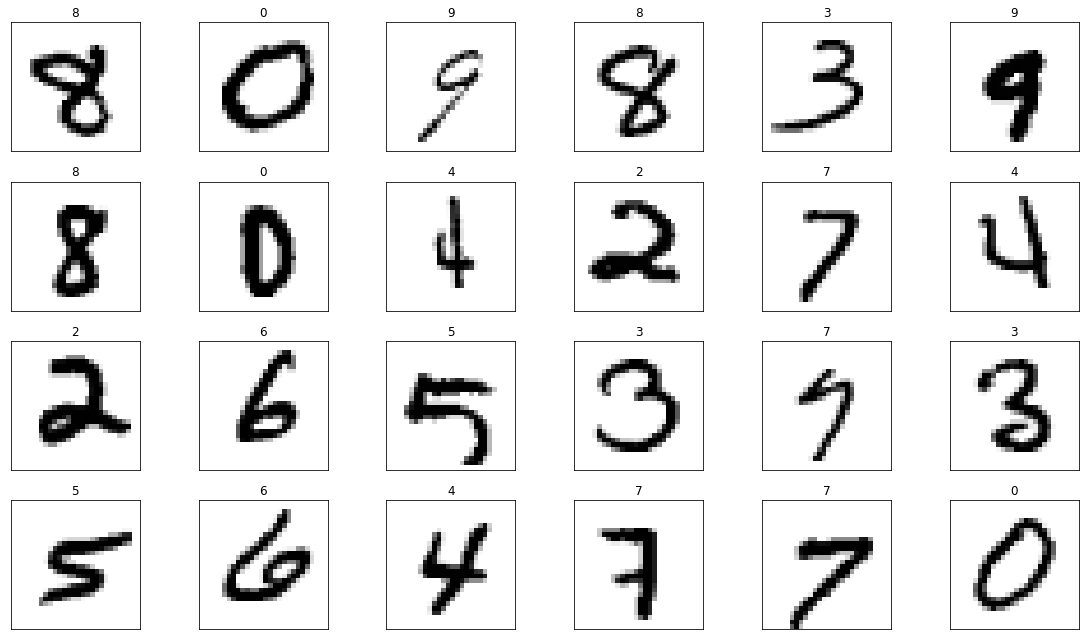

In [6]:
# imports for plotting
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
# choose 24 indices at random between 0 and len(X_train)-1
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)  
# subplots returns a tuple containing a Figure object and an array of the subplots' Axes objects
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

# zip makes you can iterate over multiple iterables of data at the same time
for item in zip(axes.ravel(), X_train[index], y_train[index]):
    # ravel creates a onedimensional view of multidimensional array
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)

plt.tight_layout()

In [7]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels = linearize the image to get a 784 (= 28x28) vector
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# normalizing the data to help with the training
# normalized data leads to better models
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [8]:
# one-hot encoding using keras' numpy-related utilities
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
print(y_train.shape)
print(y_train[0])  # one sample’s categorical data
y_test = to_categorical(y_test)
print(y_test.shape)

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(10000, 10)


In [9]:
# keras imports for building our neural network
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation

# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('sigmoid'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [10]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [12]:
# training the model and saving metrics in history
model.fit(X_train, y_train,epochs=20,verbose=2)  

Epoch 1/20
 - 23s - loss: 0.3793 - accuracy: 0.8841
Epoch 2/20
 - 23s - loss: 0.1600 - accuracy: 0.9511
Epoch 3/20
 - 23s - loss: 0.1078 - accuracy: 0.9672
Epoch 4/20
 - 23s - loss: 0.0802 - accuracy: 0.9746
Epoch 5/20
 - 23s - loss: 0.0634 - accuracy: 0.9801
Epoch 6/20
 - 23s - loss: 0.0518 - accuracy: 0.9835
Epoch 7/20
 - 23s - loss: 0.0408 - accuracy: 0.9864
Epoch 8/20
 - 23s - loss: 0.0352 - accuracy: 0.9883
Epoch 9/20
 - 23s - loss: 0.0318 - accuracy: 0.9895
Epoch 10/20
 - 23s - loss: 0.0257 - accuracy: 0.9914
Epoch 11/20
 - 24s - loss: 0.0221 - accuracy: 0.9927
Epoch 12/20
 - 23s - loss: 0.0198 - accuracy: 0.9934
Epoch 13/20
 - 23s - loss: 0.0176 - accuracy: 0.9941
Epoch 14/20
 - 23s - loss: 0.0161 - accuracy: 0.9946
Epoch 15/20
 - 23s - loss: 0.0139 - accuracy: 0.9949
Epoch 16/20
 - 23s - loss: 0.0135 - accuracy: 0.9955
Epoch 17/20
 - 24s - loss: 0.0130 - accuracy: 0.9955
Epoch 18/20
 - 23s - loss: 0.0115 - accuracy: 0.9960
Epoch 19/20
 - 23s - loss: 0.0112 - accuracy: 0.9960
Ep

In [17]:
# saving the model
import os
save_dir = "./"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)

In [18]:
mnist_model = load_model('keras_mnist.h5')
loss, accuracy = mnist_model.evaluate(X_test, y_test)

print("Test Loss", loss)
print("Test Accuracy", accuracy)

10000/10000 [==============================] - 1s 61us/step
Test Loss 0.0853631096490974
Test Accuracy 0.9830999970436096


In [19]:
# load the model and create predictions on the test set
model = load_model('keras_mnist.h5')

predictions = model.predict(X_test)
# The first digit should be a 7 (shown as 1. at index 7)
print(y_test[0])

# Check the probabilities returned by predict for first test sample
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')
    
# Our model believes this digit is a 7 with nearly 100% certainty
# Not all predictions have this level of certainty

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
0: 0.0000000001%
1: 0.0000000027%
2: 0.0000000164%
3: 0.0000011902%
4: 0.0000000000%
5: 0.0000000001%
6: 0.0000000000%
7: 100.0000000000%
8: 0.0000000002%
9: 0.0000001852%


* In the following snippet, p is the predicted value array, and e is the expected value array
* NumPy’s argmax() function determines index of an array’s highest valued element
* The function enumerate() receives and iterable and creates an iterator that, for each element, returns a tuple containing the element's index and value

In [20]:
# Locating the Incorrect Predictions
images = X_test.reshape((10000, 28, 28))

incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:  # prediction was incorrect
        incorrect_predictions.append((i, images[i], predicted, expected))

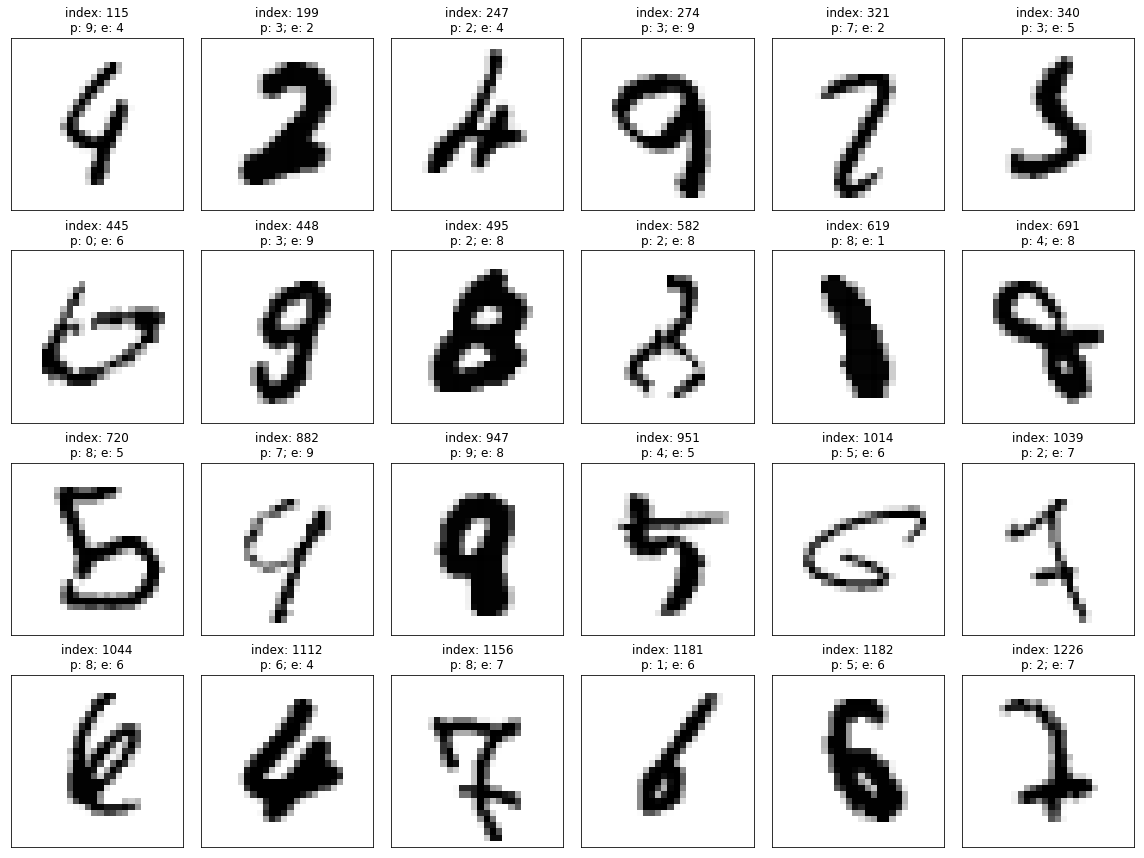

In [21]:
%matplotlib inline

figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [23]:
predictions[1156]

array([2.62761233e-07, 6.05924060e-06, 1.47902404e-06, 1.07276209e-01,
       6.91207376e-08, 4.75403965e-02, 2.62852723e-07, 1.09078206e-01,
       7.36068368e-01, 2.87270668e-05], dtype=float32)